# **SUMMARY**

In [433]:
#Jupyter notebook 
import pymupdf


In [434]:
doc =pymupdf.open("gilbert-et-al-2003-multiple-scattering-calculations-of-bonding-and-x-ray-absorption-spectroscopy-of-manganese-oxides.pdf")

In [435]:
for page_index in range(len(doc)): # iterate over pdf pages
    page = doc[page_index] # get the page
    image_list = page.get_images()
    # print the number of images found on the page
    if image_list:
        print(f"Found {len(image_list)} images on page {page_index}")
    else:
        print("No images found on page", page_index)
    for image_index, img in enumerate(image_list, start=1): # enumerate the image list
        xref = img[0] # get the XREF of the image
        pix = pymupdf.Pixmap(doc, xref) # create a Pixmap
        if pix.n - pix.alpha > 3: # CMYK: convert to RGB first
            pix = pymupdf.Pixmap(pymupdf.csRGB, pix)
        pix.save("page_%s-image_%s.png" % (page_index, image_index)) # save the image as png
        pix = None


No images found on page 0
No images found on page 1
Found 3 images on page 2
Found 2 images on page 3
No images found on page 4
Found 1 images on page 5
Found 2 images on page 6
No images found on page 7
No images found on page 8


In [436]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

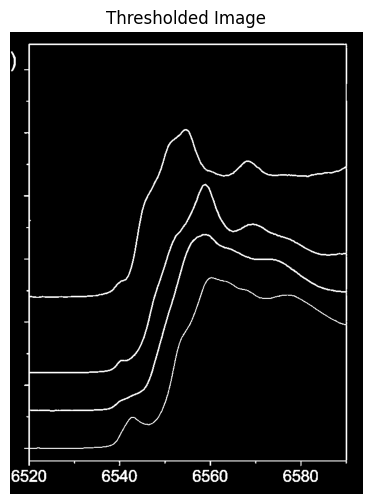

In [437]:
# Load image
img = cv2.imread("graph.png", cv2.IMREAD_GRAYSCALE)
# Thresholding to binary image
_, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
# Step: Thresholded Image
plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

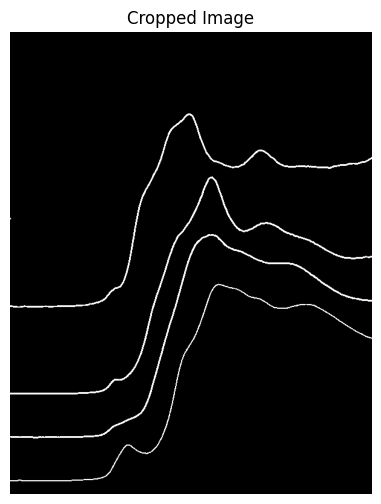

In [438]:
#step 1: crop the image to focus on the graph area
#Assuming the graph occupies most of the image, we mainly crop out the borders
#Adjust these value according to your image's borrders
cropped_img = thresh[50:-65, 38:-35] #Adjust crop dimensions as needed

#ste: Thresholded Image
plt.figure(figsize=(6,6))
plt.imshow(cropped_img, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')
plt.show()

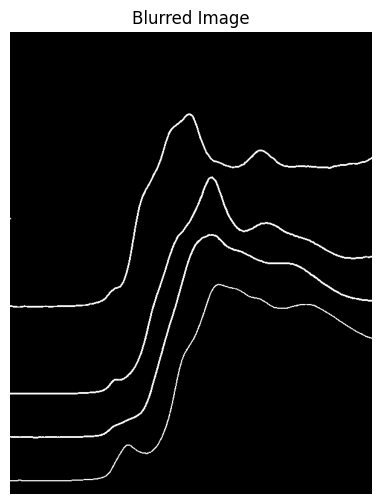

In [439]:
#Apply Gaussian Blur (optional may help smooth lines)
blurred_img=cv2.GaussianBlur(cropped_img, (1, 1), 0)

#Step: Blurred + Threshold image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()


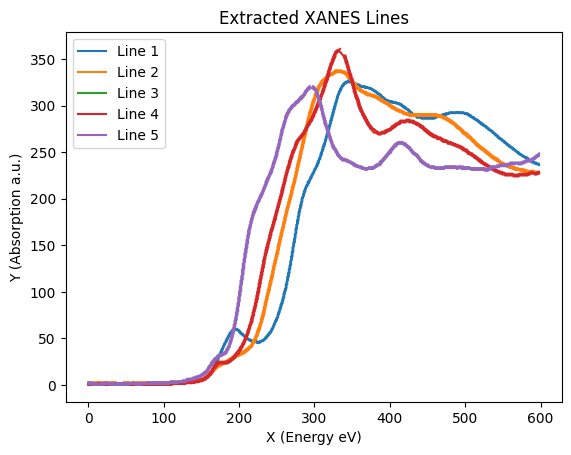

Contours found: 5


In [440]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'blurred_img' is the preprocessed image
# Find contours of the lines
contours, _ = cv2.findContours(blurred_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create lists to store the x and y coordinates of each line
lines_data = {}

# Loop through contours to extract data points for each line
for i, contour in enumerate(contours):
    # Get the contour's points and flatten to a 2D array
    contour_points = contour.squeeze()
    # Separate x and y coordinates
    x_coords = contour_points[:, 0]
    y_coords = contour_points[:, 1]
    
    # Normalize or flip y-coordinates to match your required format (increasing energy)
    y_coords = max(y_coords) - y_coords
    
    # Store the line's data points
    lines_data[f'line_{i+1}'] = {'x': x_coords, 'y': y_coords}
    
    # Optionally, plot each line
    plt.plot(x_coords, y_coords, label=f'Line {i+1}')

# Show the lines on a plot
plt.xlabel('X (Energy eV)')
plt.ylabel('Y (Absorption a.u.)')
plt.title('Extracted XANES Lines')
plt.legend()
plt.show()

# Convert the extracted data to pandas DataFrames
dataframes = {}
for line_name, data in lines_data.items():
    dataframes[line_name] = pd.DataFrame({'x': data['x'], 'y': data['y']})

print("Contours found: " + str(len(contours)))
# Blue-MnO2  -Line1
# Red -Mn3O4 -Line4
# Purple-MnO -Line5
# Orange-Mn2O3-Line2
# 

In [441]:
#  # Find contours of the lines
# contours, _ = cv2.findContours(blurred_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # Create lists to store the x and y coordinates of each line
# lines_data = {}

# # Loop through contours to extract data points for each line
# for i, contour in enumerate(contours):
#     # Get the contour's points and flatten to a 2D array
#     contour_points = contour.squeeze()
#     # Separate x and y coordinates
#     x_coords = contour_points[:, 0]
#     y_coords = contour_points[:, 1]
#     # Store the line's data points
#     lines_data[f'line_{i+1}'] = {'x': x_coords, 'y': y_coords}
# # Optionally, plot each line
#     plt.plot(x_coords, y_coords, label=f'Line {i+1}')
# # Show the lines on a plot
# plt.gca().invert_yaxis() # Invert y-axis to match image coordinate system
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()
# # Convert the extracted data to pandas DataFrames
# dataframes = {}
# for line_name, data in lines_data.items():
#     dataframes[line_name] = pd.DataFrame({'x': data['x'], 'y': data['y']})
# print("Contours found: "+str(len(contours)))
# # dataframes




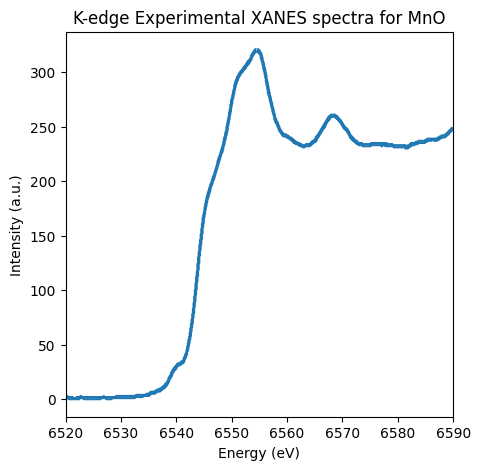

In [442]:
plt.figure(figsize=(5, 5))  # Set the figure size if needed
line5 = dataframes["line_5"]
# Plot the 'x' and 'y' columns
line5["x"]= line5["x"]*(70/600)+6520
# max_absorption = np.max(line5['y'])
# line5['y']= np.abs(line5['y']-max_absorption)
# plt.gca().invert_yaxis()  # Invert y-axis if needed
plt.plot(line5["x"], line5["y"])
plt.xlim(6520, 6590)  # Replace with the desired min and max for your x-axis

# Add labels and a title to the plot
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.title('K-edge Experimental XANES spectra for MnO')
# Show the plot
plt.show()
